# Generating Signals

#### This is a tutorial jupyter-python notebook on how to generate signals


In [1]:
### SETUP
import numpy as np
import matplotlib.pyplot as plt

# The dictionary part
from dictionary.Dictionary import Dictionary


#### 1. Create a Dictionary object with the specific sequence parameters and material properties

(see example below)


Done

~~~MATERIAL PROPERTIES~~~



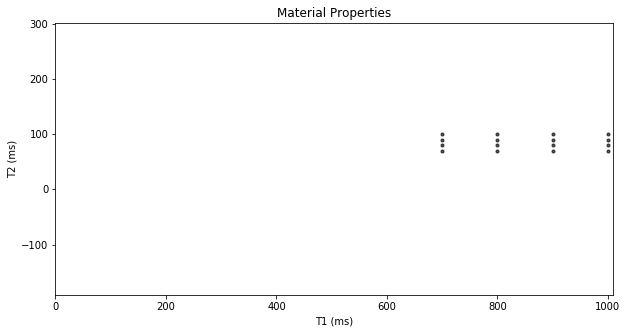


~~~SEQUENCE PROPERTIES~~~



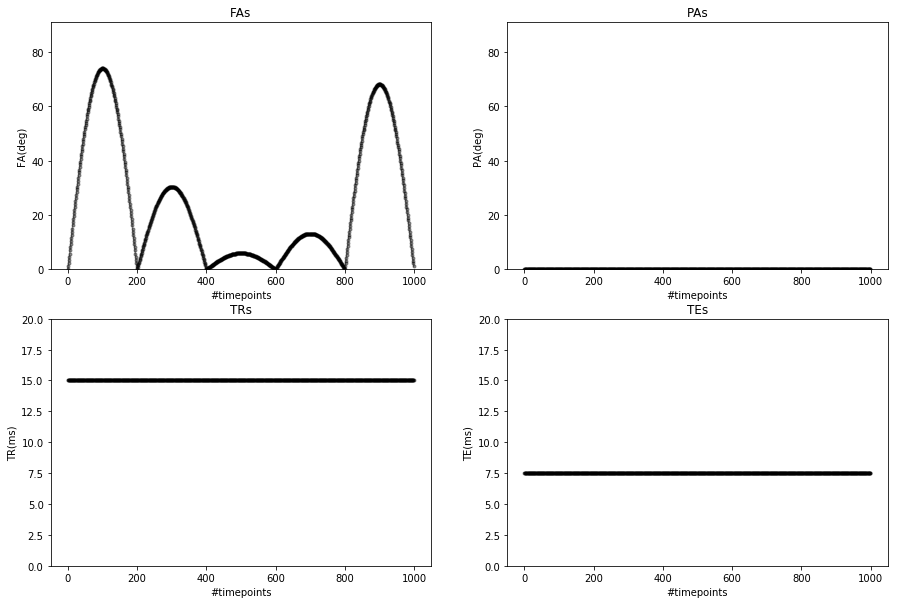

Progress 1000/1000 TR blocks
Simulation took 0.36872386932373047 seconds.



In [2]:
#### SEQUENCE
# SETUP your sequence attributes variable
sequenceAttr = {};
# There are 3 options:
# 1. To generate the values sinusoidally 
sequenceAttr['type'] = 'sinu';
sequenceAttr['N'] = 1000;
# 2. To generate the values randomly
# sequenceAttr['type'] = 'rand';
# sequenceAttr['N'] = 1000;
# 3. To read the values from a file
# sequenceAttr['type'] = 'custom';
# sequenceAttr['filename'] = 'inputFiles/sequenceParametersN300.csv';


#### MATERIAL
# SETUP your material attributes variable
materialAttr = {};
# 1. Default values of GM/WM/CSF/Fat at 1.5T
# materialAttr['type'] = 'default';
# 2. Values from the bSSFP paper
# materialAttr['type'] = 'bssfp';
# 3. Values from the FISP paper
# materialAttr['type'] = 'fisp';
# 4. Values from file
materialAttr['type'] = 'custom';
materialAttr['filename'] = 'inputFiles/materialParameters.csv';


#### TYPE OF SEQUENCE
#TypeOfSequence = 'fisp'; # not yet implemented
TypeOfSequence = 'bssfp';

### Create a dictionary object with the properties described above
dicty = Dictionary(sequenceAttr, materialAttr, TypeOfSequence)


#### 2. Plot some of your dictionary signals

The dictionary is a matrix of: (32, 1000, 3) elements
consisting of: M = 32 material tupes and N = 1000 TR blocks


The material tuples can be seen here: 

T1 = [1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.  700.  700.  700.  700.
  700.  700.  700.  700.  800.  800.  800.  800.  800.  800.  800.  800.
  900.  900.  900.  900.  900.  900.  900.  900.]

T2 = [100. 100.  70.  70.  80.  80.  90.  90. 100. 100.  70.  70.  80.  80.
  90.  90. 100. 100.  70.  70.  80.  80.  90.  90. 100. 100.  70.  70.
  80.  80.  90.  90.]

df = [0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4
 0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4 0.  0.4]



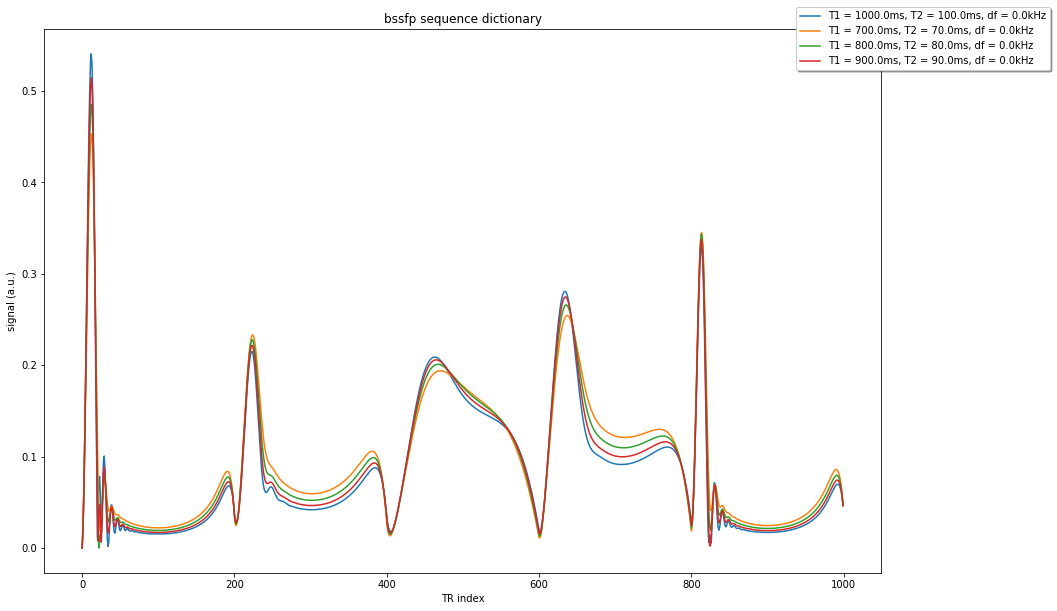

In [3]:
# Helpful prints:
print("The dictionary is a matrix of: " + str(dicty.dictionaryMRF.shape) + " elements")
print("consisting of: M = " + str(dicty.M) + " material tupes and N = " + str(dicty.N) + " TR blocks\n\n")

print("The material tuples can be seen here: \n")
print("T1 = " + str(dicty.materialProperties.materialTuples[0,:]) + "\n")
print("T2 = " + str(dicty.materialProperties.materialTuples[1,:]) + "\n")
print("df = " + str(dicty.materialProperties.materialTuples[2,:]) + "\n")

# Plot some indices
indices = np.arange(0,dicty.M,int(dicty.M/3))#[0,4,8]

# Legend text 
legendText = []

# Plot
fig = plt.figure(figsize=(15,10))
for i in indices:
    plt.plot(np.arange(0,dicty.N), \
             np.sqrt(dicty.dictionaryMRF[i,:,0]*dicty.dictionaryMRF[i,:,0] + \
                     dicty.dictionaryMRF[i,:,1]*dicty.dictionaryMRF[i,:,1]), \
             label=str('T1 = '+str(dicty.materialProperties.materialTuples[0,i]) + \
                      'ms, T2 = '+str(dicty.materialProperties.materialTuples[1,i]) + \
                      'ms, df = '+str(dicty.materialProperties.materialTuples[2,i]) + "kHz"))

plt.legend(loc='upper center', bbox_to_anchor=(1.05, 1.05),
           ncol=1, fancybox=True, shadow=True)
plt.xlabel('TR index')
plt.ylabel('signal (a.u.)')
plt.title(TypeOfSequence + ' sequence dictionary')

plt.show()

